In [1]:
from IPython.core.display import HTML, Image
css_file = 'style.css'
HTML(open(css_file, 'r').read())

In [4]:
from sympy import init_printing, Matrix, symbols
init_printing()

# The four fundamental subspaces
# Introducing the matrix space

## The four fundamental subspaces

In this section, we bring together the four fundamentals spaces in linear algebra:  

* The column space, $C\left( A \right)$
* The nullspace, $N \left( A \right)$
* The rowspace:
    * All linear combinations of rows
    * All linear combinations of $A^T$ and $C \left( A^T \right)$
* The nullspace of $A^T$, $N \left( A^T \right)$ (also termed the left nullspace of A)

For a matrix (with dimensions noted) $A_{m \times n}$ we that $C \left( A \right)$ is in  $\mathbb{R}^m$, $N \left( A \right)$ is in $\mathbb{R}^n$, $C \left( A^T \right)$ is in $\mathbb{R}^n$, and $N \left( A^T \right)$ is in $\mathbb{R}^m$.

## Calculating basis and dimension

We also need to know the bases and dimensions of these fundamental spaces:

* $C \left( A \right)$
    * The bases are the picot columns
    * The dimension is the rank, $r$
* $N \left( A \right)$
    * The bases are the special solutions (one for every free variable, $n-r$)
    * The dimensions are $n-r$
* $ C \left( A ^T \right)$
    * If $A$ is reduced to row-echelon form, $R$, then $ C\left( R \right) \ne C \left( A \right)$
    * We do have, though, that the rowspace of $R$ is equal to the rowspace of $R$, in other words $ C \left( R^T \right) = C \left( A^T \right)$
* $ N \left( A^T \right) $
    * The bases are such that:
        * $A^T \underline{y} = \underline{0}$
        * $ \underline{y}^T {\left( A^T \right)}^T = \underline{0}^T $
        * $ \underline{y}^T A = \underline{0}^T$
        * These are the pivot columns of $R^T$ 
    * The dimensions are $m-r$

## Example problems

### Example 1

Consider this example matrix and calculate the bases and dimension for all four fundamental spaces

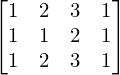

In [7]:
A = Matrix([[1, 2, 3, 1], [1, 1, 2, 1], [1, 2, 3, 1]]) # We note that rows 1 and three are identical and that
# columns 3 is the addtion of columns 1 and 2 and column 1 equals column 4
A

#### Columnspace

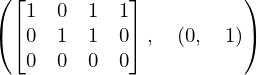

In [8]:
A.rref() # Remember that the columnspace contains the pivot columns as a basis

* The bases are the pivot columns:  
$ \begin{bmatrix} 1 & 0 \\ 0 & 1 \\ 0 & 0 \end{bmatrix} $  
* This is indeed $\mathbb{R}^3$ (each column vector in the matrix has three components) as $A_{m \times n} = A_{3 \times 4}$

* The rank (no of columns with pivots) is $2$, thus $\text{dim} \left( A \right) = 2$

#### Nullspace

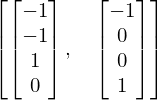

In [9]:
A.nullspace() # Calculating the nullspace vectors

* The basis is in $\mathbb{R}^4$ ($A$ has $n = 4$ columns)

In [6]:
A.rref() # No pivots for columns 3 and 4

⎛⎡1  0  1  1⎤, [0, 1]⎞
⎜⎢          ⎥        ⎟
⎜⎢0  1  1  0⎥        ⎟
⎜⎢          ⎥        ⎟
⎝⎣0  0  0  0⎦        ⎠

* The dimension is $2$ (there are $2$ column vectors, which is indeed $n-r=4-2=2$

#### Rowspace C(A<sup>T</sup>)

* Here, we are looking for the pivot columns of $A^T$

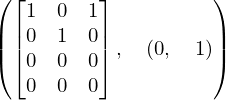

In [14]:
A_t = A.transpose()
A_t.rref()

* The pivot rows of $A$ (columns in $A^T$) are rows $1$ and $2$ (columns $1$ and $2$ of $A^T$)

* As stated above, it is in $\mathbb{R}^4$

* The dimension are $n-r=4-2=2$

#### Nullspace of A<sup>T</sup>

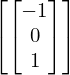

In [15]:
A_t.nullspace()

* Which is in $\mathbb{R}^3$

* The dimension is $1$, since $m-r=3-2=1$ (remember that the rank is the number of pivot columns)

### Example 2

Consider this example matrix (in LU form) and calculate the bases and dimension for all four fundamental spaces

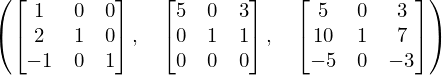

In [16]:
L = Matrix([[1, 0, 0], [2, 1, 0], [-1, 0, 1]])
U = Matrix([[5, 0, 3], [0, 1, 1], [0, 0, 0]])
A = L * U
L, U, A

#### Columnspace of A

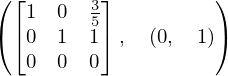

In [17]:
A.rref()

* The basis is thus:  
$ \begin{bmatrix} 1 & 0 \\ 0 & 1 \\ 0 & 0 \end{bmatrix} $
* Another basis would be the pivot columns of L:  
$ \begin{bmatrix} 1 & 0 \\ 2 & 1 \\ -1 & 0 \end{bmatrix} $
* It is in $\mathbb{R}^3$, since $m=3$
* It has a rank of $2$ (two pivot columns)
* Since the dimension of the columnspace is equal to the rank, $\text{dim} \left( A \right) = 2$
    * Note that it is also equal to the number of pivot columns in U

#### Nullspace of A

In [11]:
A.nullspace()

⎡⎡-3/5⎤⎤
⎢⎢    ⎥⎥
⎢⎢ -1 ⎥⎥
⎢⎢    ⎥⎥
⎣⎣ 1  ⎦⎦

* The nullspace is in $\mathbb{R}^3$, since $n=3$
* The basis is the special solution(s), which is one column vector for every free variable
    * Since we only have a single free variable, we have a single nullspace column vector
    * This fits in with the fact that it needs to be $n-r$
    * It can also be calculated by taking $U$, setting the free variable to $1$ and solving for the other rows by setting each equal to $0$
* The dimension of the nullspace is also $1$ ($n-r$, i.e. a single column)
    * It is also the number of free variables

#### The rowspace

* This is the columnspace of $A^T$
* Don't take the transpose first!
* Row reduce, identify the rows with pivots and transpose them

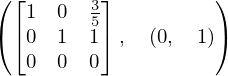

In [18]:
A.rref()

* The basis can also be written down by identifying the rows with pivots in $U$ and writing them down as columns (getting their transpose)
$$ \begin{bmatrix} 5 & 0 \\ 0 & 1 \\ 3 & 1 \end{bmatrix} $$
* It is in $\mathbb{R}^3$, since $n=3$
* The rank is $2$, which is equal to the dimension, i.e. $\text{dim} \left( A^T \right) = 2$

#### The nullspace of A<sup>T</sup>

In [13]:
A.transpose().nullspace()

⎡⎡1⎤⎤
⎢⎢ ⎥⎥
⎢⎢0⎥⎥
⎢⎢ ⎥⎥
⎣⎣1⎦⎦

* It is indeed in $\mathbb{R}^3$, since $m=3$
* A good way to do it is to take the inverse of $L$, such that $L^{-1}A=U$
    * Now the free variable row in $U$ is row three
    * Take the corresponding row in $L^{-1}$ and transpose it
* The dimension in $m-2=3-2=1$

## The matrix space

Note square matrix is also a _vector_ space, because they obey the vector space rules of addition and scalar multiplication.  Subspaces (of same) would include:
* Upper triangular matrices
* Symmetric matrices